# Modelando a Transmissão

Até agora viemos modelando a transmissão, usando a *lei de ação de massas*, $\beta S I$, onde a transmissão é proporcional ao **produto das densidades de Suscetíveis e Infeciosos**. Entretanto existem diversas outras formulações para a transmissão, propostas na literatura. [McCallun et al](http://homepages.wmich.edu/~malcolm/BIOS6150-Ecology/Discussion%20References/McCallum-etal-TREE2001.pdf). discutem as principais em um artigo muito interessante.

Segundo alguns autores, $\beta S I$, não representa uma verdadeira lei de ação de massas, e que esta deveria ser escrita como $\beta S I/N$, onde $N$ é a o tamanho da população, $N=S+I+R$, no caso de um modelo $SIR$.
Por que este distinção é importante?

Segundo Anderson e May, em sua [obra clássica](https://books.google.com.br/books?hl=en&lr=&id=HT0--xXBguQC&oi=fnd&pg=PA25&ots=Ick9PSXTeg&sig=QEMwwdqiZH9VN-LIaBMepgf5UGo#v=onepage&q&f=false), Quando modelamos a transmissão usando  a expressão  $\beta S I$, existe um limiar no número de suscetíveis, que abaixo deste valor, impede que uma doença infecciosa se estabeleça em uma população de suscetíveis. Claramente, se $R_0=\frac{\beta S_0}{\gamma}$, Para obtermos um valor de $R_0=1$, ponto de bifurcação transcrítica além do qual existe o equilíbrio endêmico, $S_0=\frac{\gamma}{\beta}$. Contudo, quando formulamos a transmissão como $\beta S I/N$, tal limiar populacional não existe, a invasibilidade depende apenas da razão entre $\gamma$ e $\beta$, esta forma de transmissão é denominada de **dependente da frequência**, ou independente da densidade.

#### Exercício 1: 

Mostre que o limiar epidêmico não depende de N quando a transmissão é modelada como $\beta S I/N$.

A lei de ação de massas, pela qual a taxa de contatos entre $S$ e $I$ depende de suas respectivas densidades, implica em uma mistura perfeitamente aeatória das populações, denominada panmixia, entretanto podemos facilmente imaginar situações em que isto não é verdadeiro. Por exemplo, a probabilidade de um médico encontrar um infeccioso é muito maior do que a dada pelo produto das densidades de médicos e infecciosos na população, pois os infecciosos ativamente procuram os médicos.
Formulações alternativas

na tabela 1 do artigo de McCallum et al., são listadas pelo menos 7 formulações para a transmissão:

1. $\beta S I$ : dependente da densidade
1. $\beta S I/N$: dependente da frequência
1. $\beta S^p I^q$: relação de potência. Associada com heterogeneidades na susceptibilidade e Infecciosidade
1. $\beta I (N-I/q)$ quando  $I<q N$ ou $0$ quando $I \geq qN$: A constante $0<q<1$, representa um efeito de refúgio, onde $q$ é a proporção da população potencialmente suscetível, devido a heterogeneidades espaciais.
1. $kS ln(1+\frac{\beta I}{k})$: Binomial Negativa: Um $k$ pequeno corresponde a uma infecção altamente agregada. A medida em que $k \rightarrow \infty$, a expressão se reduz à lei de ação de massas.
1. $\frac{N}{1-\epsilon+\epsilon N}\frac{F(S,I)}{N}$:Função de contato assintótica, separada do termo de mistura $F(S,I)$, pode ser qualquer um dos acima. Se $\epsilon=0$, os contatos são proporcionais a $N$, se $\epsilon=1$, os contatos são independentes de $N$
1. $\frac{\beta S I}{c+S+I}$: transmissão assintótica, $c$ é uma constante.

#### Exercício 2:

Para cada uma das formulações da transmissão acima, faça um gráfico 3D da taxa de transmissão x $S$ x $I$. 


In [4]:
var('beta S I')
beta=1
plot3d(beta*S**0.7*I**0.4, (S,0.01,1),(I,0.01,1), mesh=True, alpha=0.5)

Graphics3d Object



#### Exercício 3:

Analise um modelo $SI$ para cada tipo de transmissão listado acima, calcule o $R_0$, e identifique se existe um limiar epidêmico e qual a sua expressão.


In [9]:
def refuge(t,y, parms):
    I=y[0]
    N,beta,q, gammma = parms
    return [beta*I*(N-(I/q))-gamma*I]

In [12]:
T=ode_solver()
T.function = refuge
t_span = [0,1]
ic = [1]
N=100
beta=2
q=0.5
gamma = 0.1
T.ode_solve(t_span,ic,num_points=100, params=[N,beta,q,gamma])

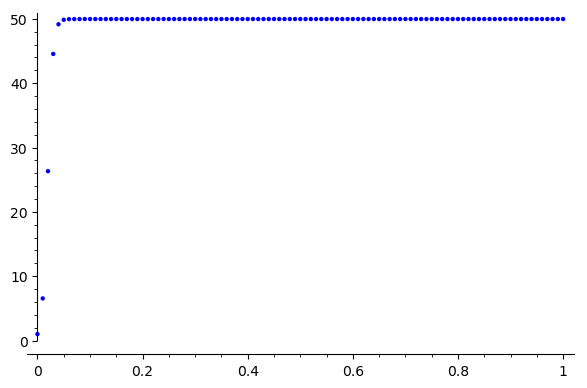

In [13]:
T.plot_solution()


#### Exercício 4:

Para cada umas das funções de transmissão $f(S,I)$, acima,  crie uma função interativa onde seja possível  explorar os efeitos  dos parâmetros sobre a dinâmica temporal  da epidemia.


In [14]:
@interact
def f3(p=(1,(0,1,.1)),q=(1,(0,1,.1))):
    P = plot3d(beta*S^p*I^q, (S,0,1),(I,0,1), mesh=True, alpha=0.5)
    show(P)

Interactive function <function f3 at 0x7f794cadd1e0> with 2 widgets
  p: FloatSlider(value=1.0, description='p…